#Part 1: Propose 2-3 Modifications

##New relationships 

**Implement a different mechanism for creating new relationships — not
entirely random, like in the basic model, and not with a weight of 0.5. You should determine
a realistic process for how people who haven't met get introduced and how the new
relationship can strengthen or weaken over time**

People who have not met will get introduced to each other if they share at least one common neighbour with a probability of 0.01. The weight of these connections will be as follows

0.1 if the number of common neighbors = 1; 

0.35 if the number of common neghors = 2; 


0.65 if the number of common neghbors > 2

These weightings model a more realistic interaction, whereby, the stregnth of your relationship with someone is stronger if you share more social connections and weaker if you share fewer social connections

##Personalized parameters 
**In the basic model there the same setting for alpha, beta and
gamma is used for all nodes and edges. These parameters govern how quickly people
change their opinions and relationship strengths. Modify the model to allow each person to
have their own set parameter values (perhaps drawn from the same probability distribution,
which you would need to define) so that some people are more stubborn than others, and
some people change the strength of their relationship more quickly than others.**

The alpha parameter which represents the rate at which nodes adjust their opinions has been adjusted to be randomly drawn from a beta distribution with α = 1 and β = 3 to represent the more realistic situation that more people will likely have a strong hold in their opinions but some will easily be swayed.

The beta parameter which represents the rate at which nodes adjust their weights according to the difference in their opinions has been adjusted to be randomly drawn from a power law distribution to represent a more realistic situiation in which people with differeing opinions will tend to change their weights to a higher degree to represent weaker relationships with the increase in the difference in opinions.

#Part 2: Local Analysis

For different values of gamma, we expect that the convergence (the social network will never split into two distinct groups of different opinions) will depend on the values of beta and alpha. However, for values of gamma that are below 1, we will always see convergence. 

However, we expect that for large values of beta, we have little convergence as this will affect the rate at which two nodes of differing opinions can remain in contact. With greatly differing opions, I expect to see that separations will occur faster. This is modeled using a power law to show that for greater differences we have a greater likelihood of separation and for smaller differences we see that they are less likely to split. This distribution makes it such that most nodes have a high tolerance for a difference in opinions as few people have extreme opinions. 

The rate at which nodes adjust their opinions is modelled using a beta distribution with alpha 1 and gamma 3 which would inidcate that there is a less probability of people changing their opinions as this is expected in human behavior due to the fact that we hold our opinions very strongly due to socialization and the effects of having stronger connections with individuals who have similar opinions. This will reinforce our opinions and therefore, make it less likely that a person would willingly change their opinion because of a new connection in our social network who holds a differing opinion (as this connection will initially be weak unless the opinions shared and number of similar connections is high).


In [0]:
from matplotlib import pyplot
import itertools
import scipy

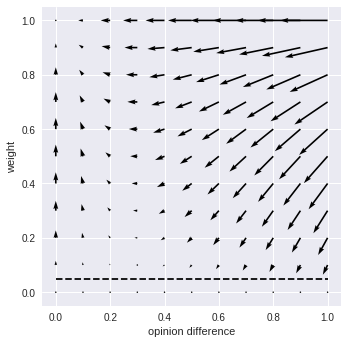

In [229]:
alpha = np.random.beta(1, 3)
beta = np.random.power(1)
gamma = 3.3

cmap = pyplot.cm.viridis  # good for color blindness

# Plot vector field
opinion = scipy.linspace(0, 1, 11)  # the difference in opinion, |o_i - o_j|
weight = scipy.linspace(0, 1, 11)   # the edge weight, w_ij
ow_grid = scipy.meshgrid(opinion, weight)
delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0]
delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0])
pyplot.quiver(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid)

# Annotate plot
pyplot.xlabel('opinion difference')
pyplot.ylabel('weight')
pyplot.plot([0, 1], [0.05, 0.05], 'k--')
pyplot.axis('square')
pyplot.show()

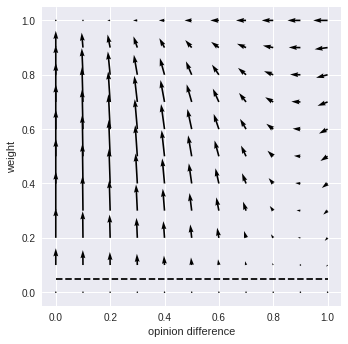

In [243]:
alpha = np.random.beta(1, 3)
beta = np.random.power(1)
gamma = 1.1

# Plot vector field
opinion = scipy.linspace(0, 1, 11)  # the difference in opinion, |o_i - o_j|
weight = scipy.linspace(0, 1, 11)   # the edge weight, w_ij
ow_grid = scipy.meshgrid(opinion, weight)
delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0]
delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0])
pyplot.quiver(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid)

# Annotate plot
pyplot.xlabel('opinion difference')
pyplot.ylabel('weight')
pyplot.plot([0, 1], [0.05, 0.05], 'k--')
pyplot.axis('square')
pyplot.show()

#Part 3: Implementation

###Choose the type of graph to use — select and motivate for one of the types of random graphs you have encountered in this course.

The graph used is a barabasi albert graph as it closely models social networks. In a barabsi albert graph, some nodes have stronger connectivity than others and these nodes are more likley to form new connections as they are more widely connected

###Modify the Python code from the basic model, or write your own version of the code from scratch, to implement your modified model.

###Make sure you structure and document your code properly so that it is easy to read and understand.

In [0]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import random

In [0]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, gamma =4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights  
        that will model a uniform distribution to reflect a more
        realistic model where some relationships are stronger than others
        '''
        self.graph = nx.barabasi_albert_graph(50, 1)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = random.uniform(0, 1)
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        for node in self.graph.nodes:
            self.graph.nodes[node]['alpha'] = np.random.beta(1, 3)
        for node in self.graph.nodes:
            self.graph.nodes[node]['beta'] = np.random.power(1)


    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
                nodes = list(self.graph.nodes)
            # Create a new edge between two unconnected nodes
                while True:
                    new_edge = random.sample(nodes,2)
                    if self.graph.has_edge(new_edge[0], new_edge[1]) == False:
                        break
                self.graph.add_edge(new_edge[0], new_edge[1])
                
            #  Assignment of weights based on the number of common connections  
                number_neighbors = len(list(self.graph.neighbors(new_edge[0]) 
                                                and self.graph.neighbors(new_edge[1])))
                if number_neighbors >= 1:
                    self.graph.edges[new_edge]['weight'] = 0.1
                elif number_neighbors == 3:
                    self.graph.edges[new_edge]['weight'] = 0.35
                else:
                    self.graph.edges[new_edge]['weight'] = 0.65
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            alpha = [self.graph.nodes[n]['alpha'] for n in edge]
            beta = [self.graph.nodes[n]['beta'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + alpha[i] * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                beta[i] * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


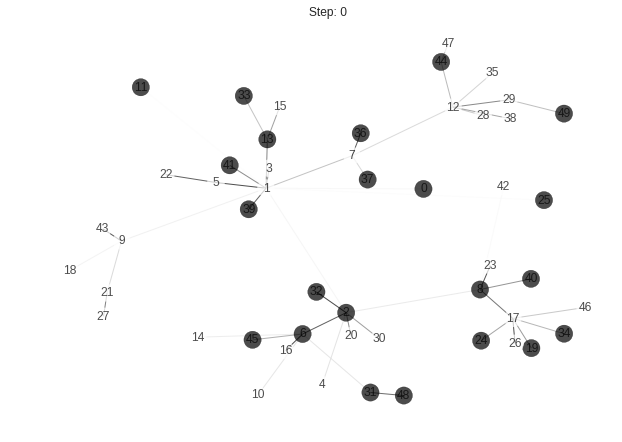

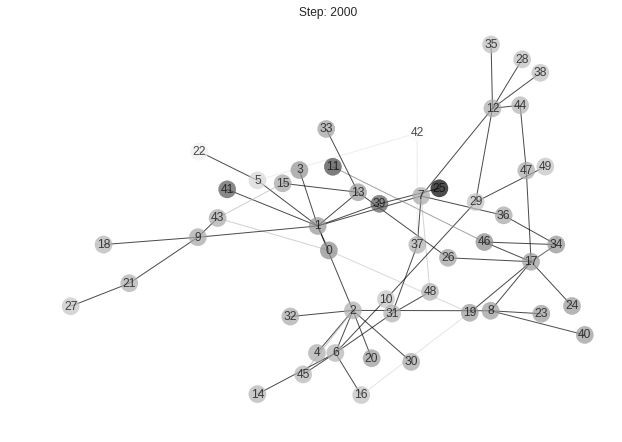

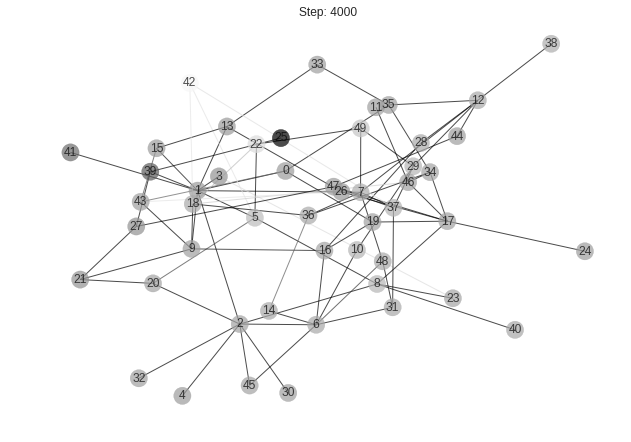

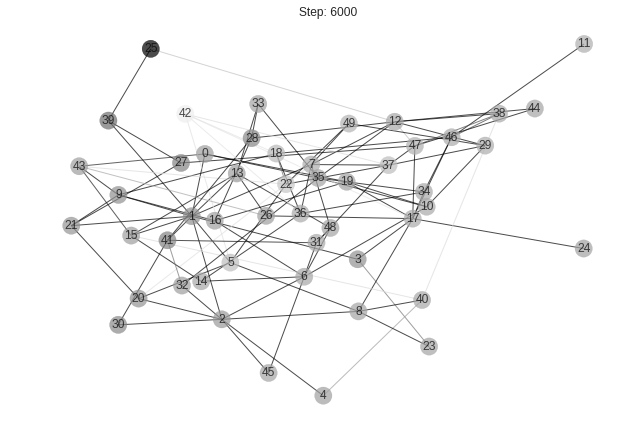

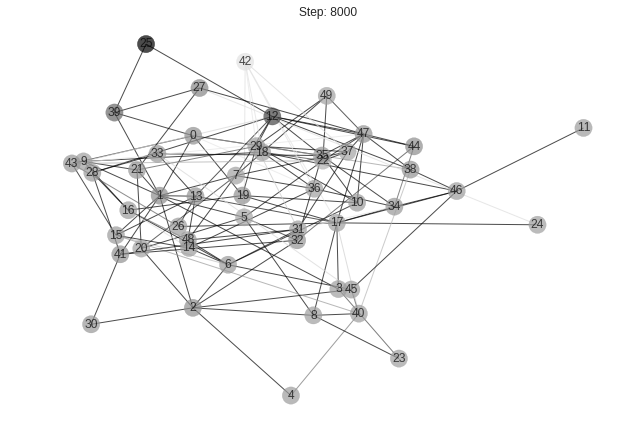

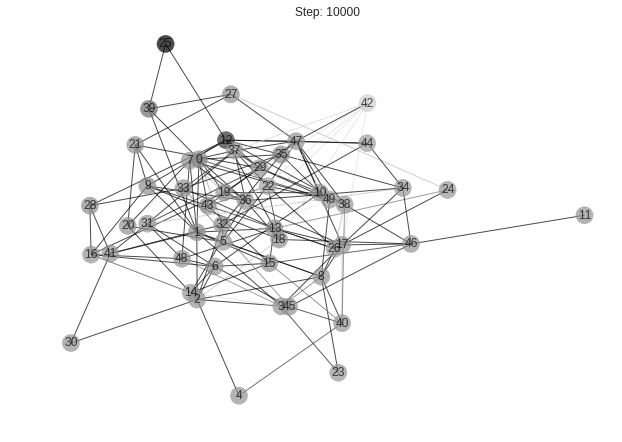

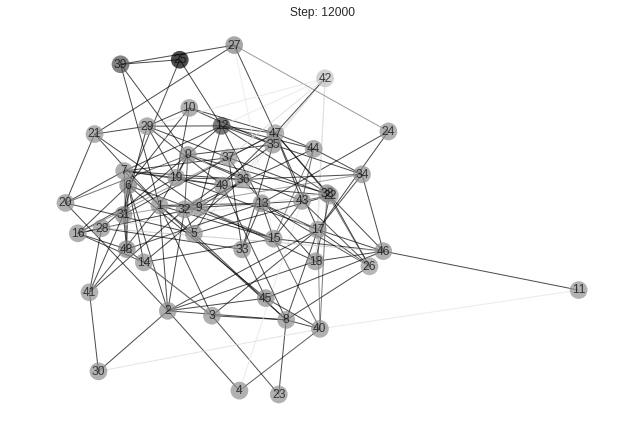

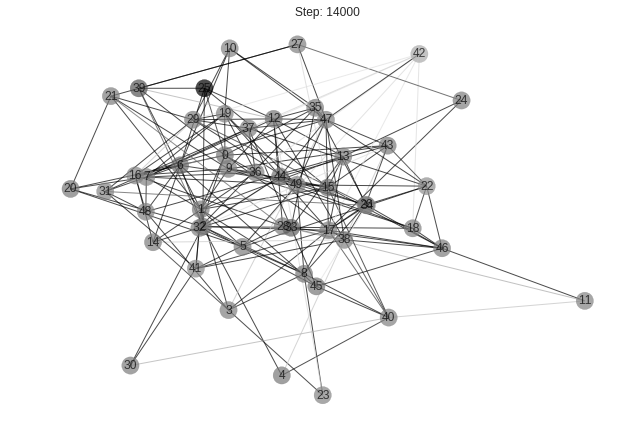

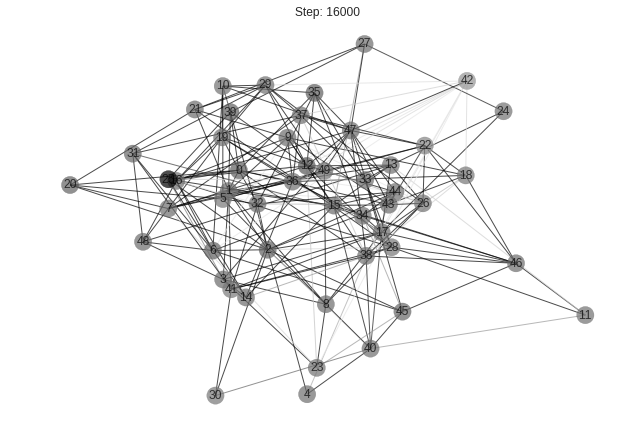

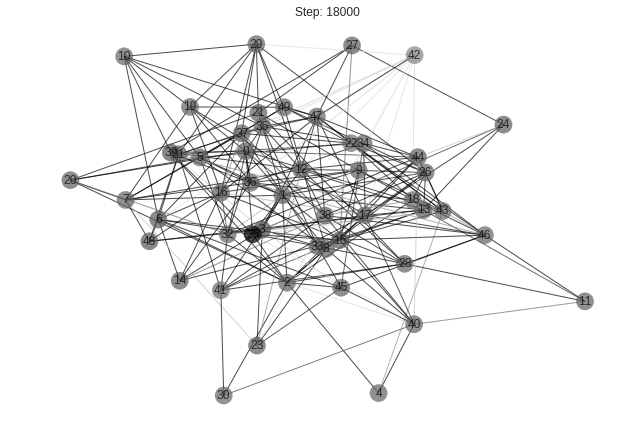

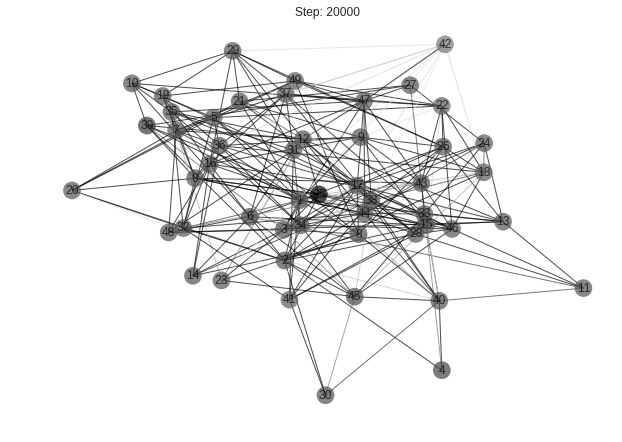

In [135]:
sim = SocialDynamicsSimulation(gamma=0.1)
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


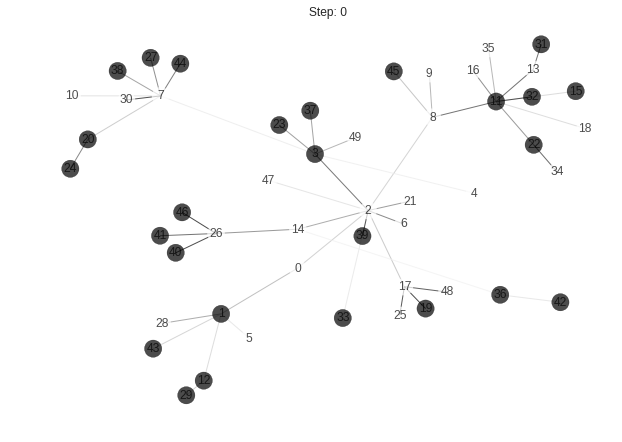

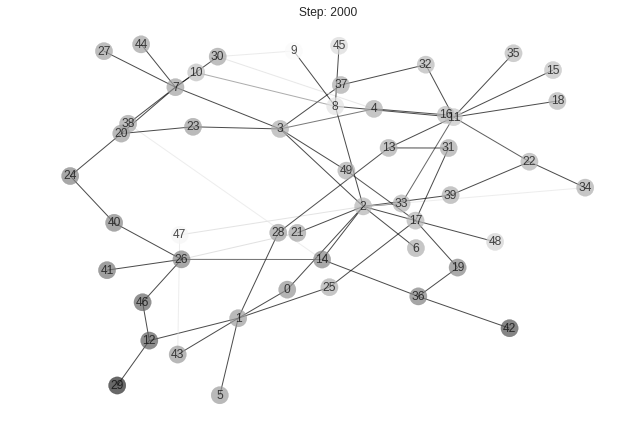

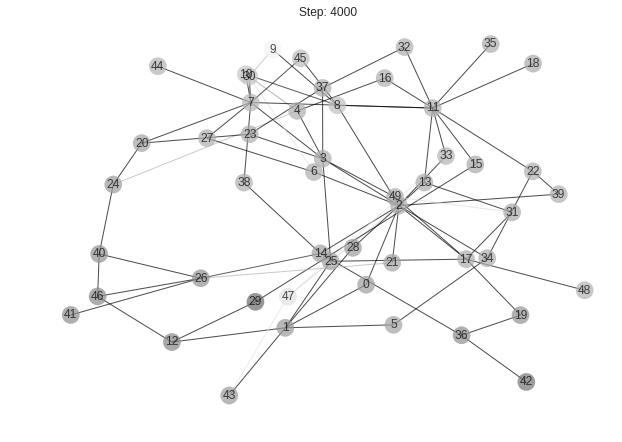

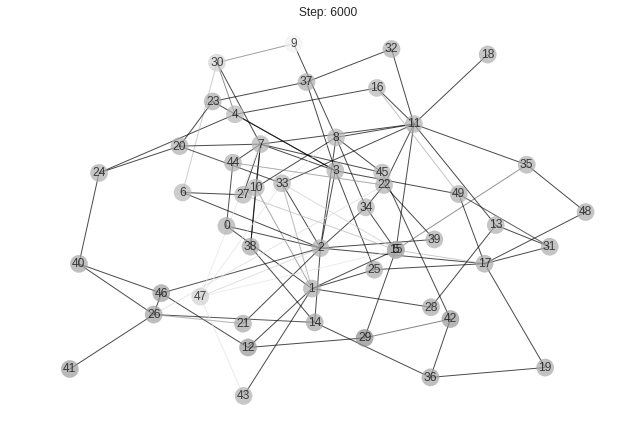

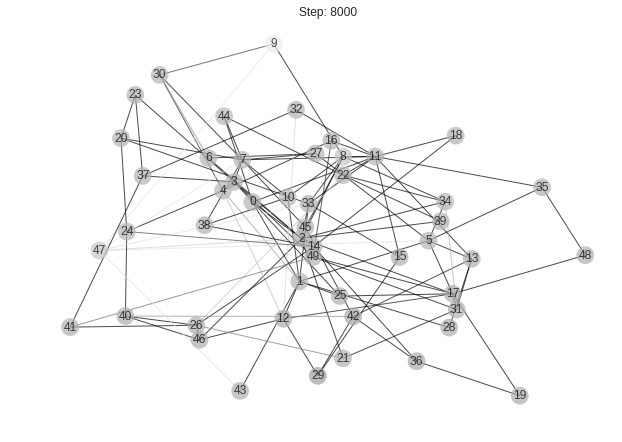

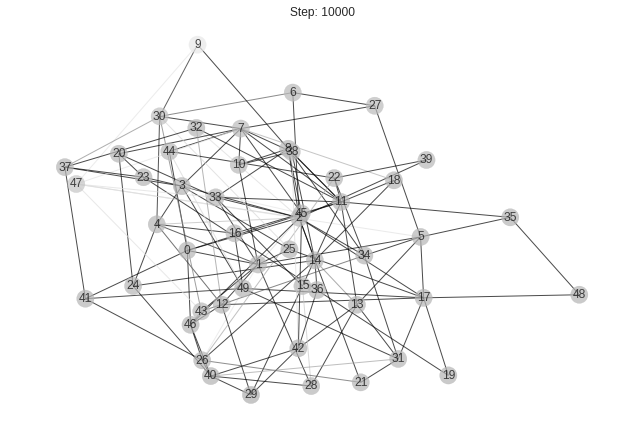

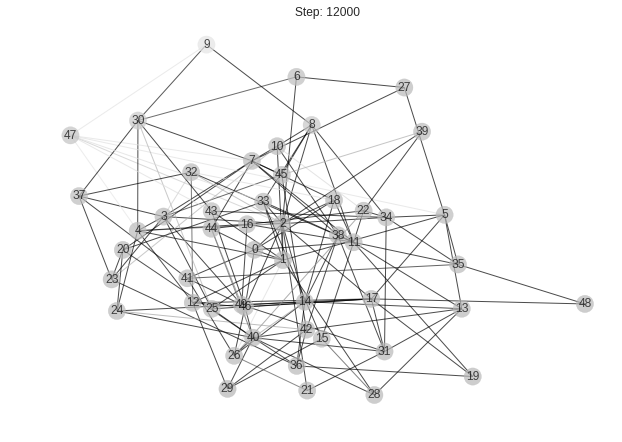

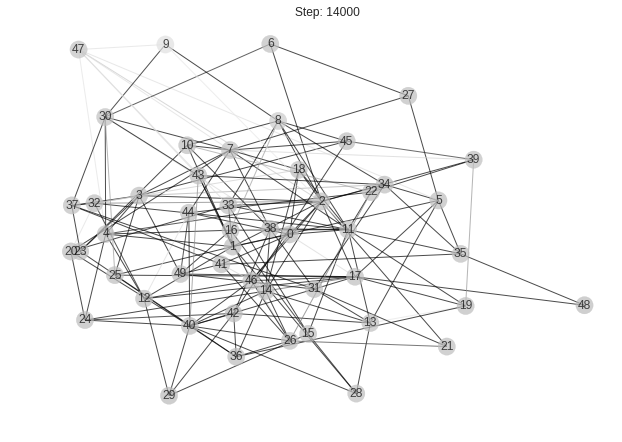

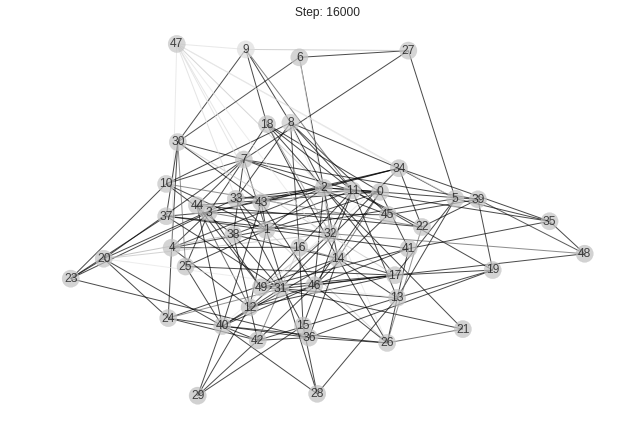

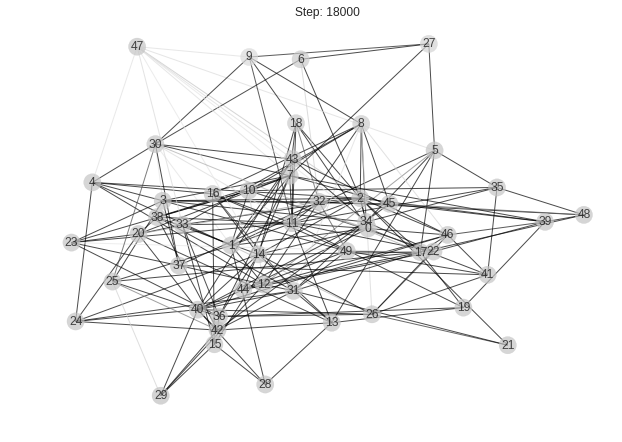

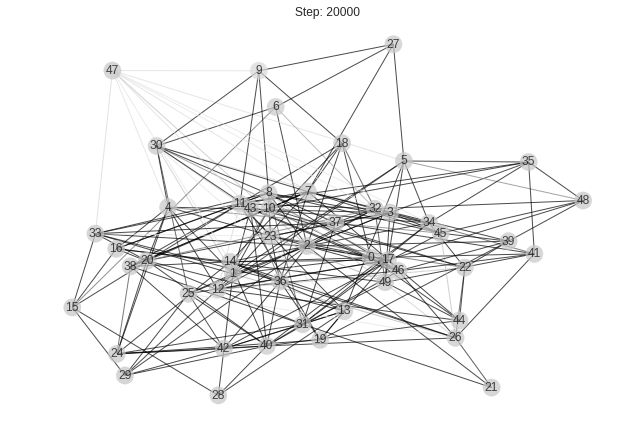

In [136]:
sim = SocialDynamicsSimulation(gamma=0.8)
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


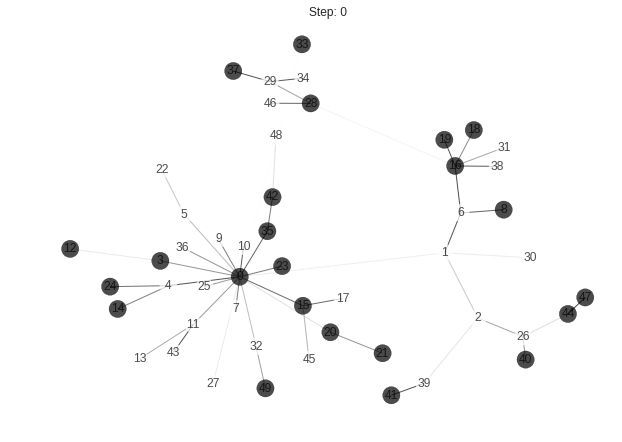

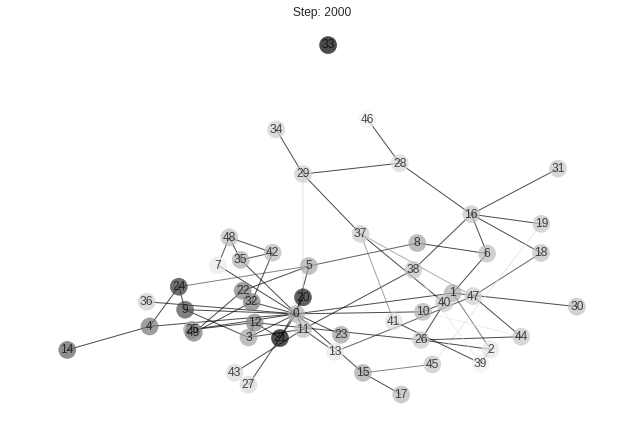

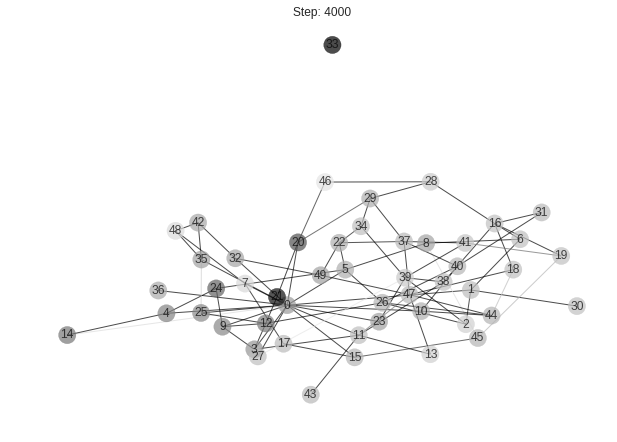

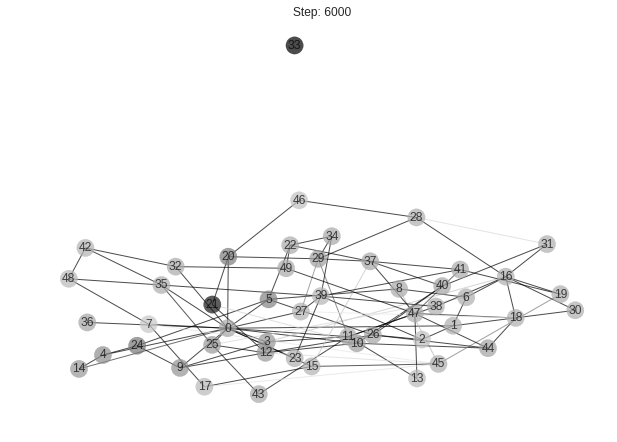

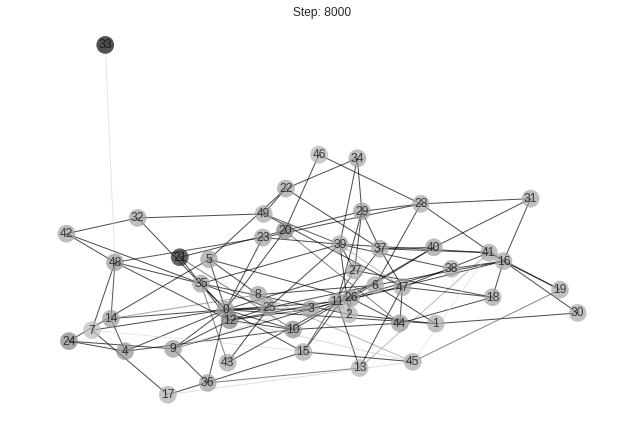

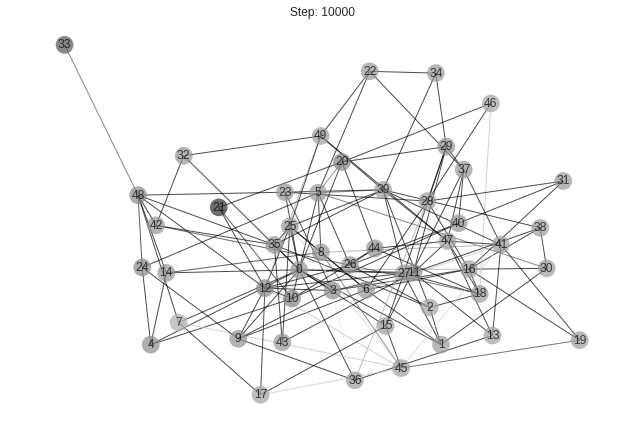

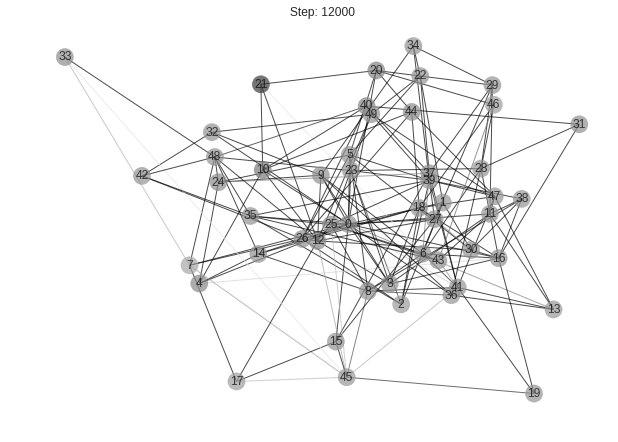

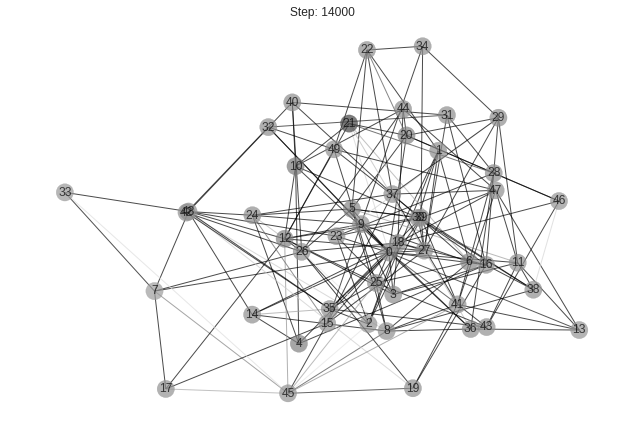

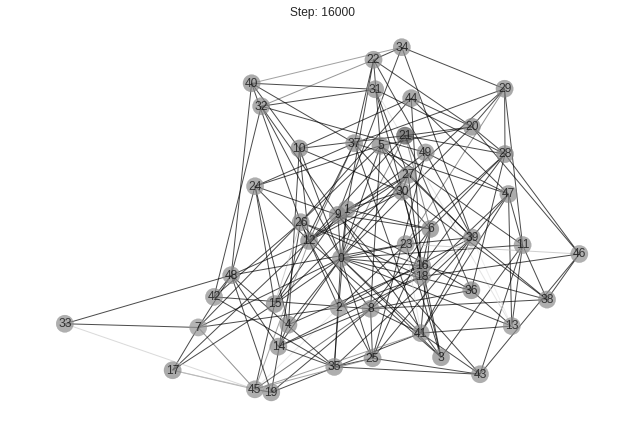

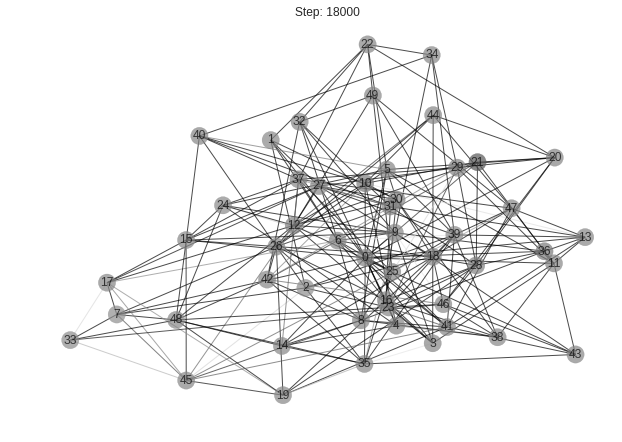

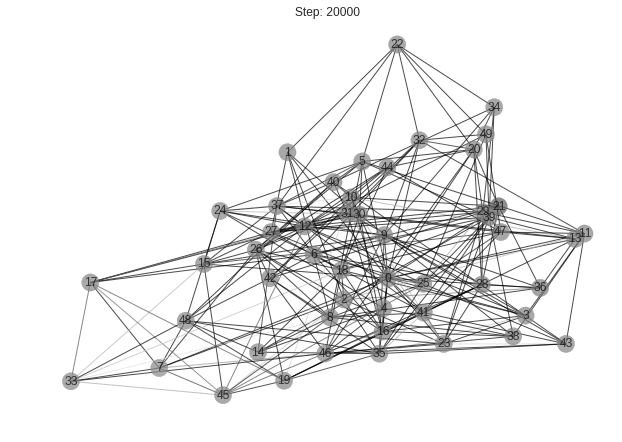

In [137]:
sim = SocialDynamicsSimulation(gamma=1)
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


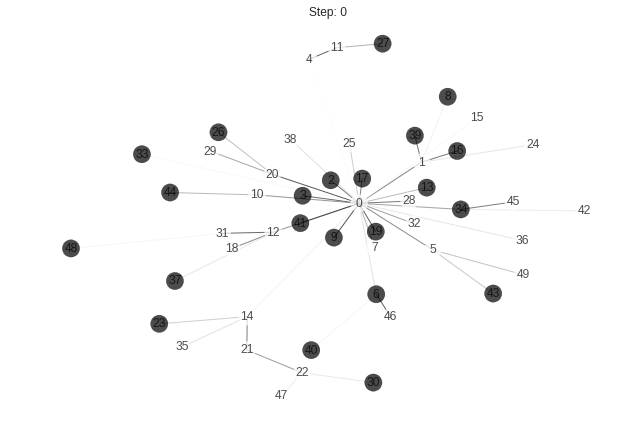

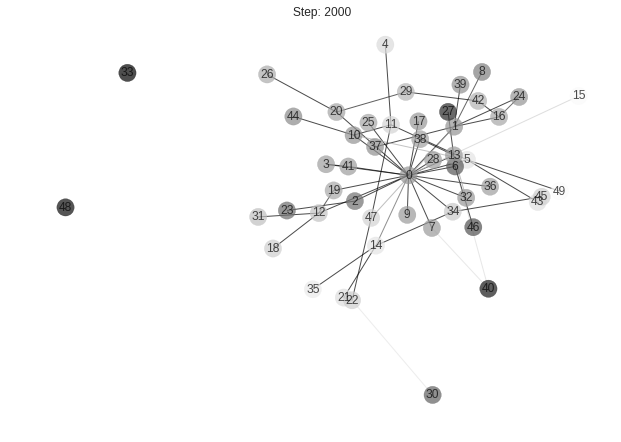

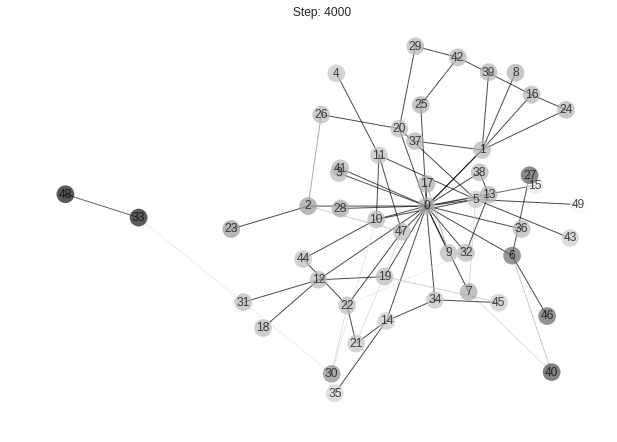

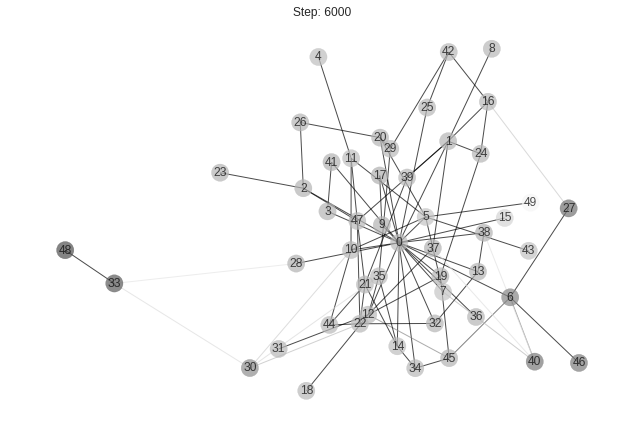

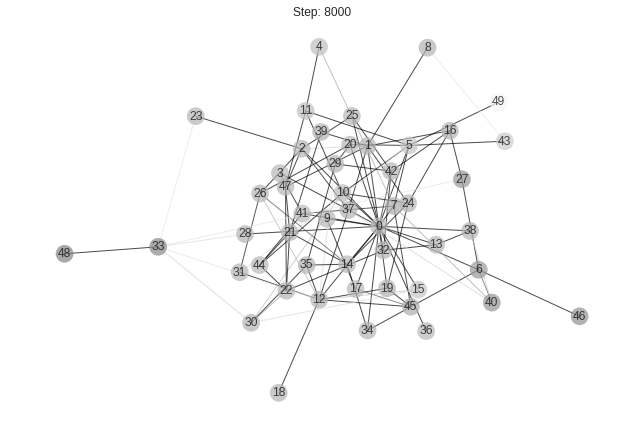

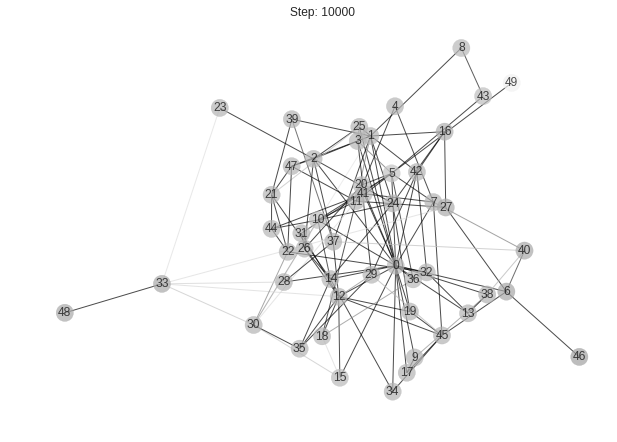

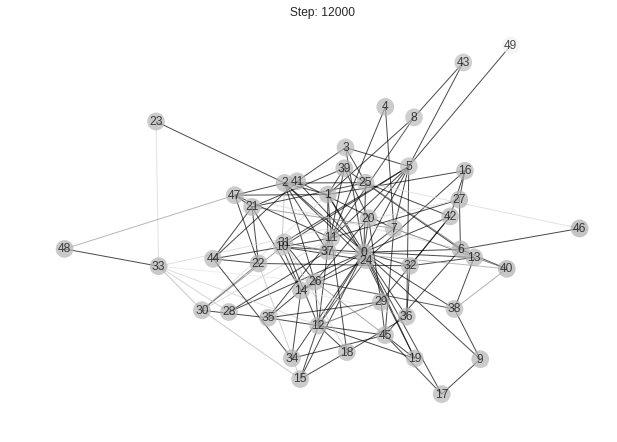

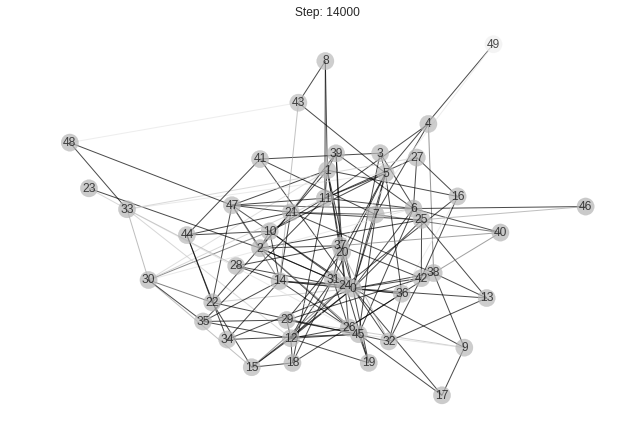

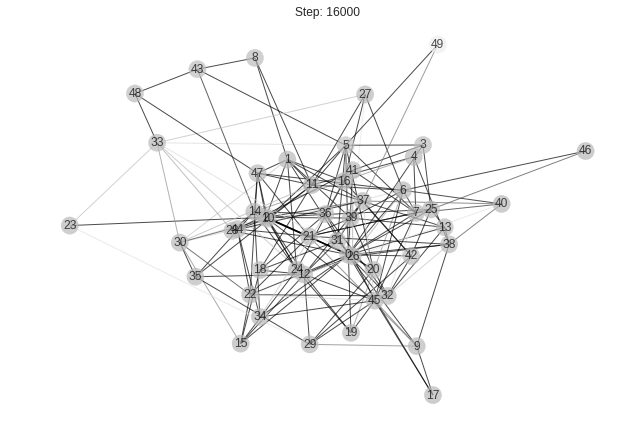

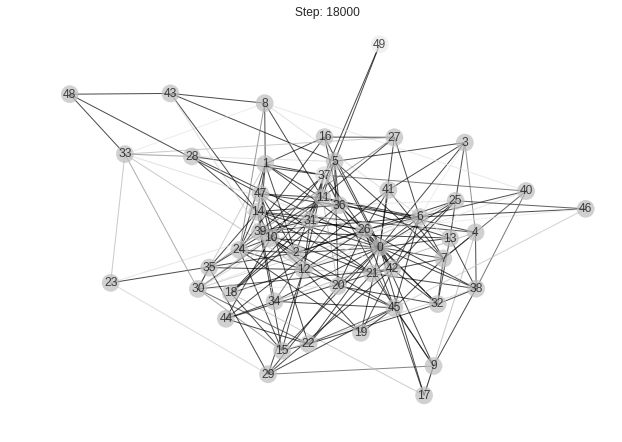

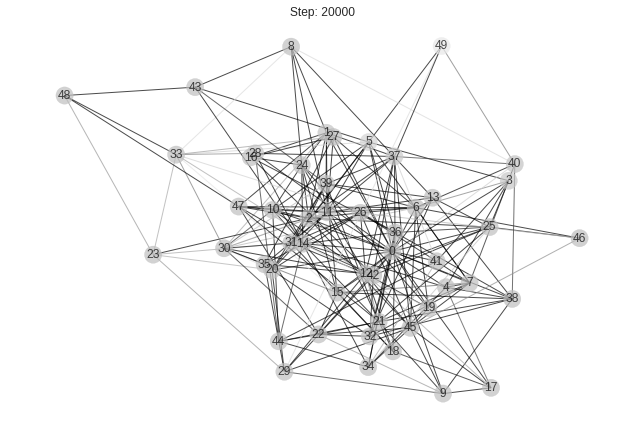

In [138]:
sim = SocialDynamicsSimulation(gamma=1.7)
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


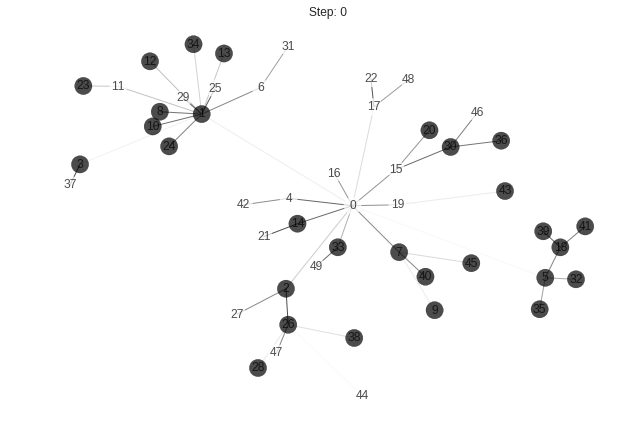

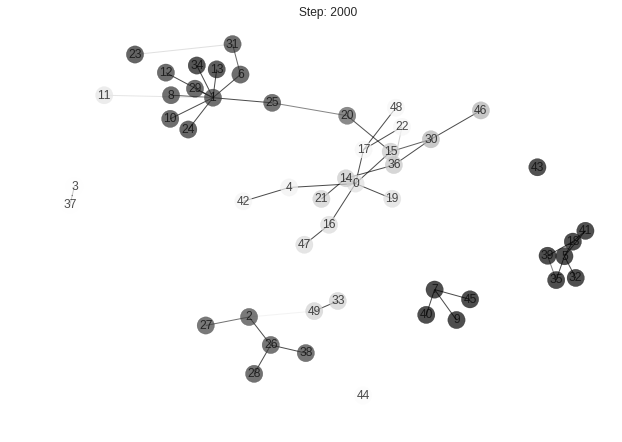

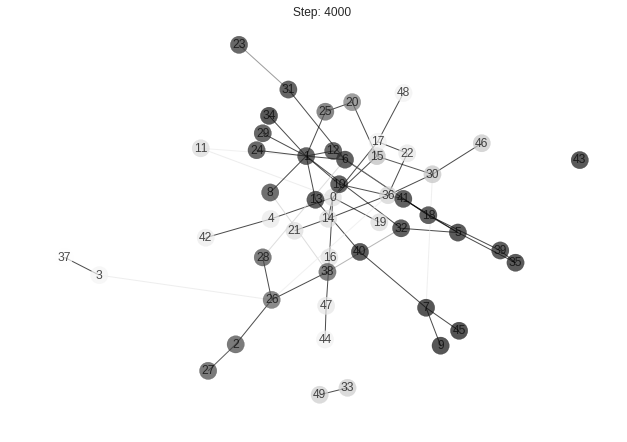

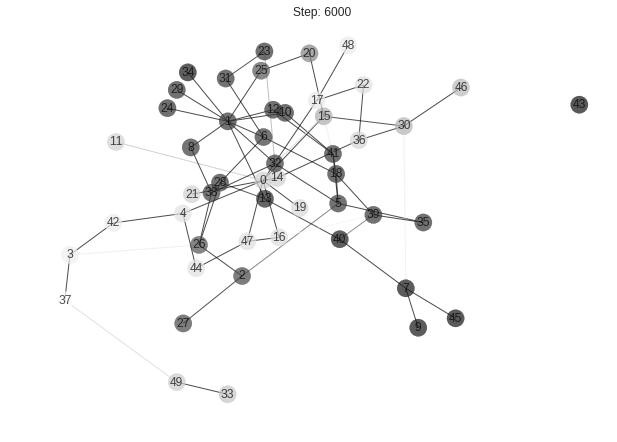

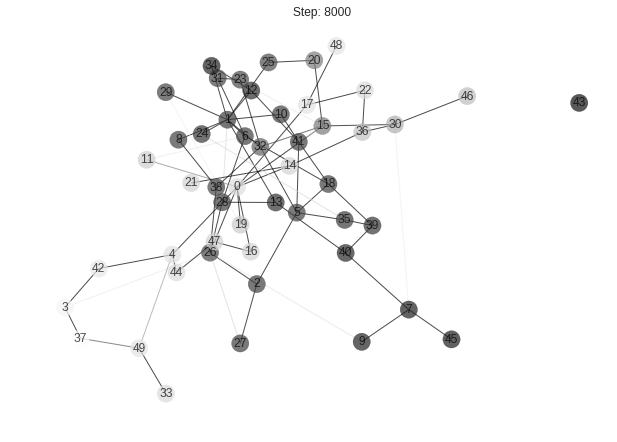

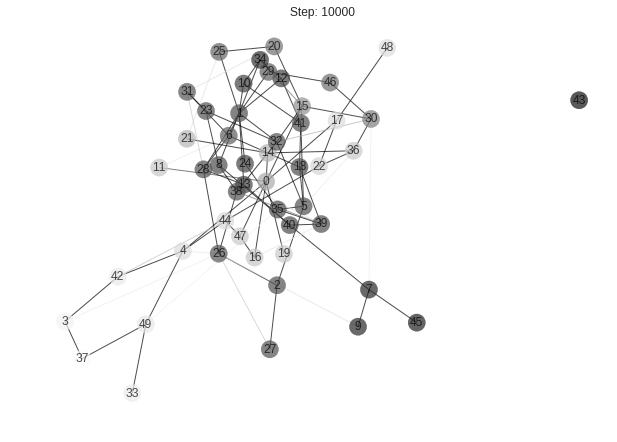

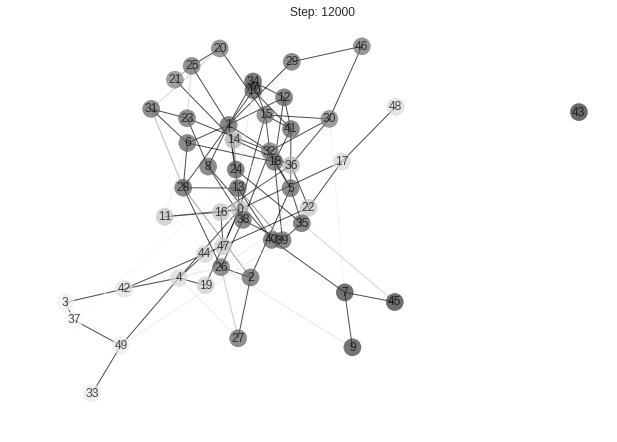

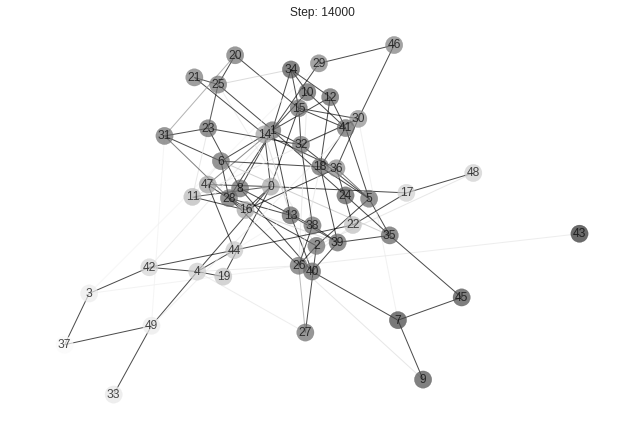

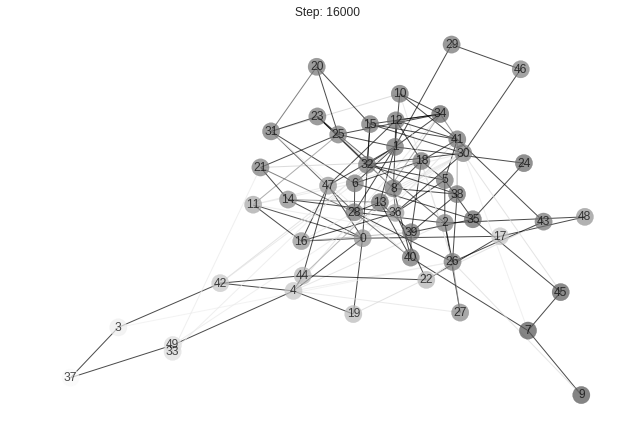

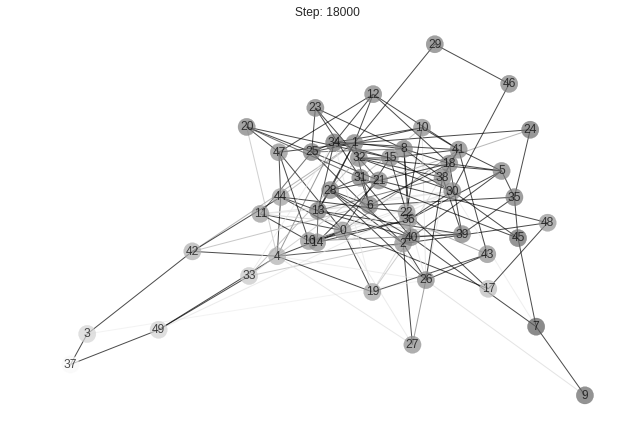

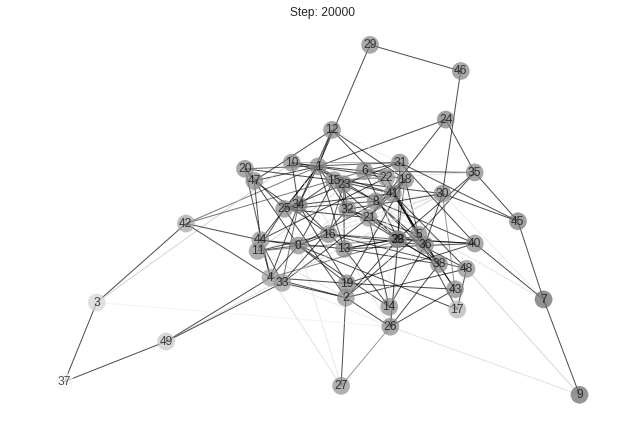

In [139]:
sim = SocialDynamicsSimulation(gamma=2.5)
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


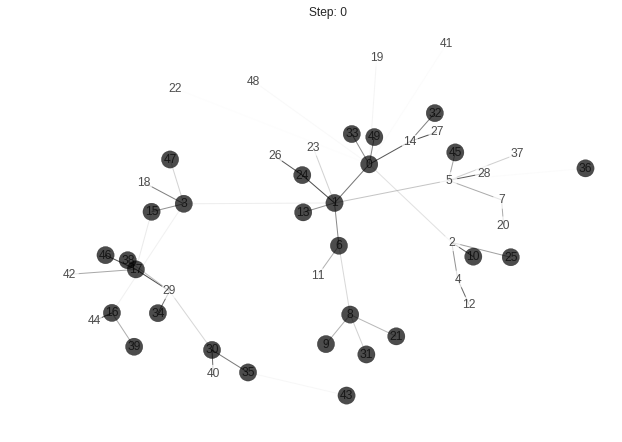

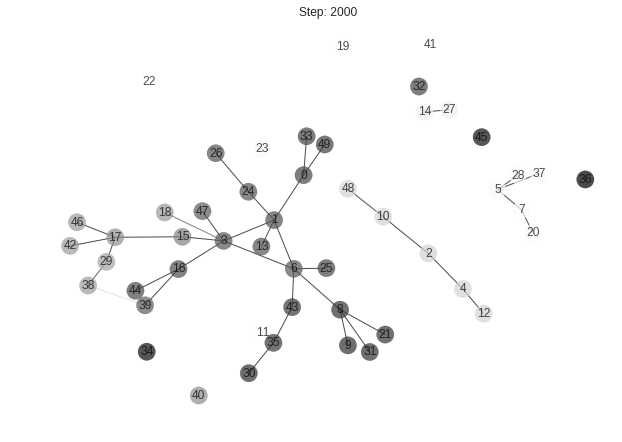

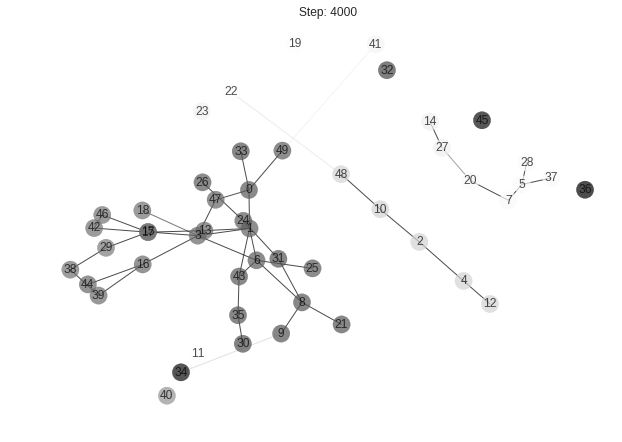

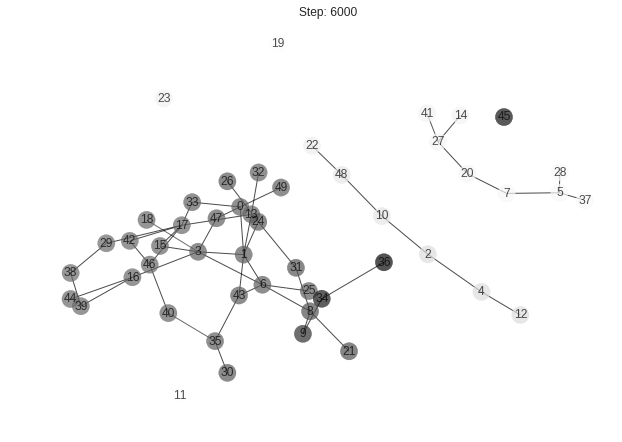

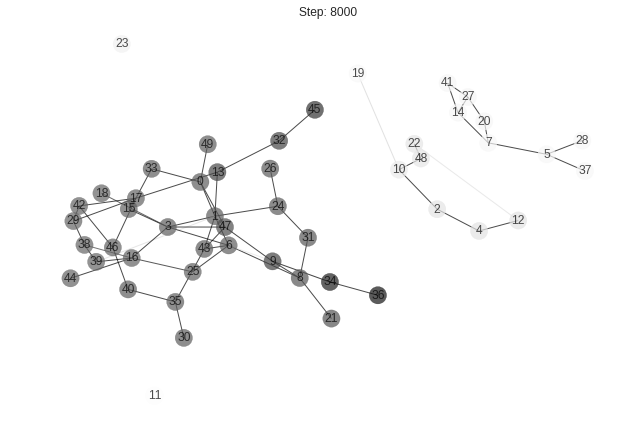

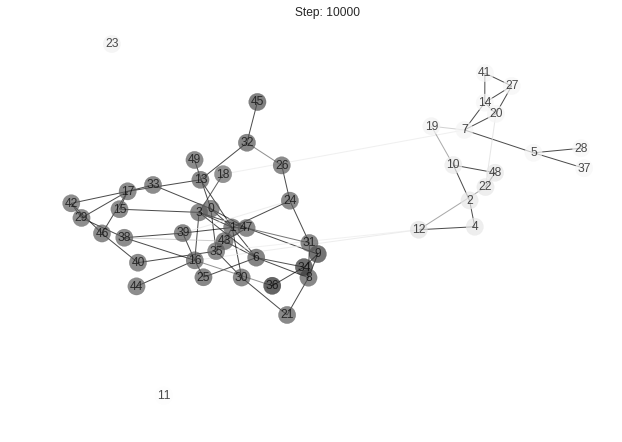

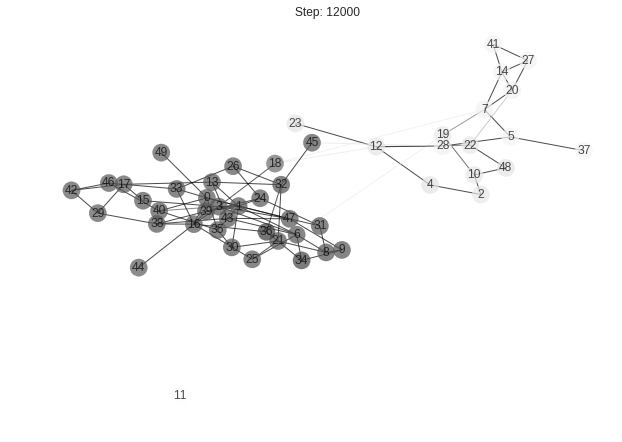

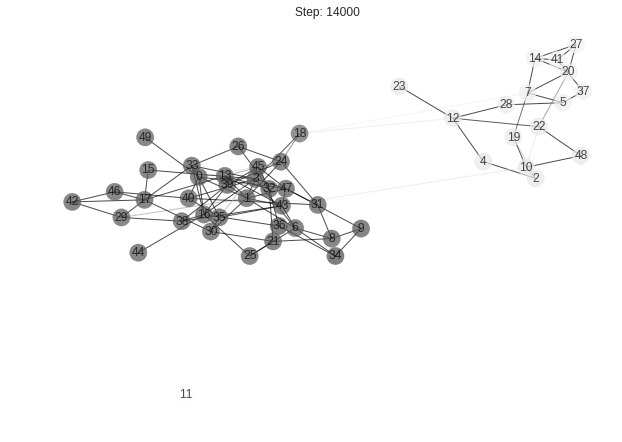

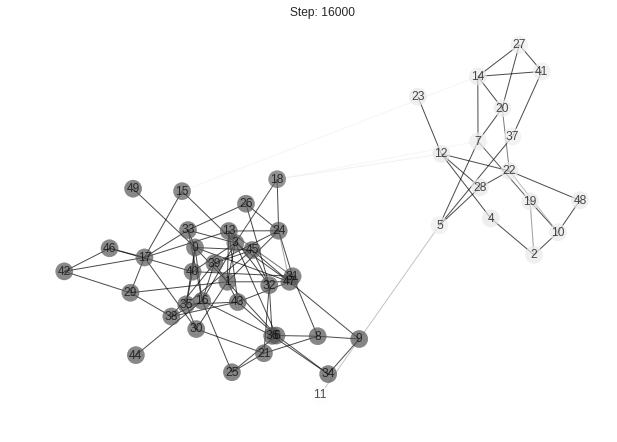

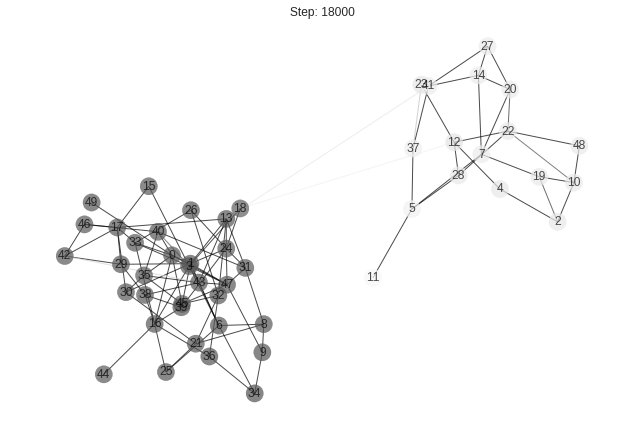

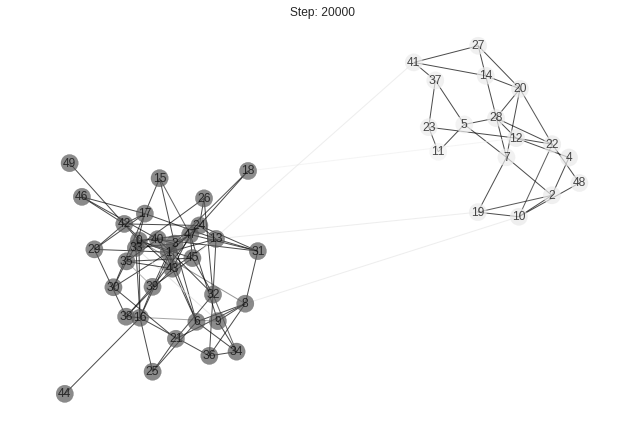

In [140]:
sim = SocialDynamicsSimulation(gamma=3.3)
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


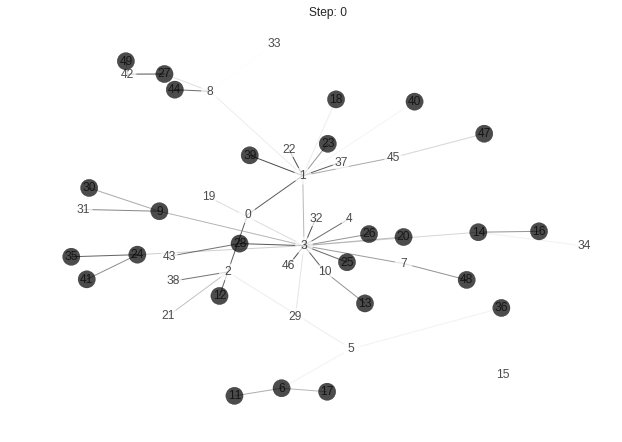

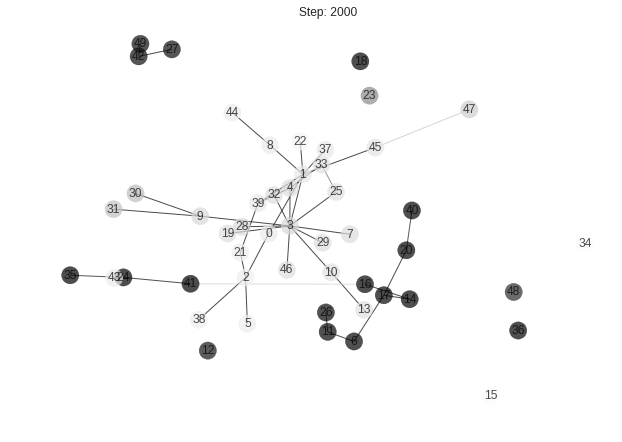

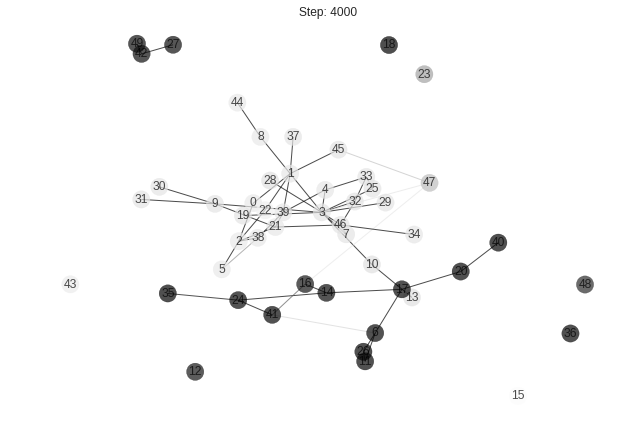

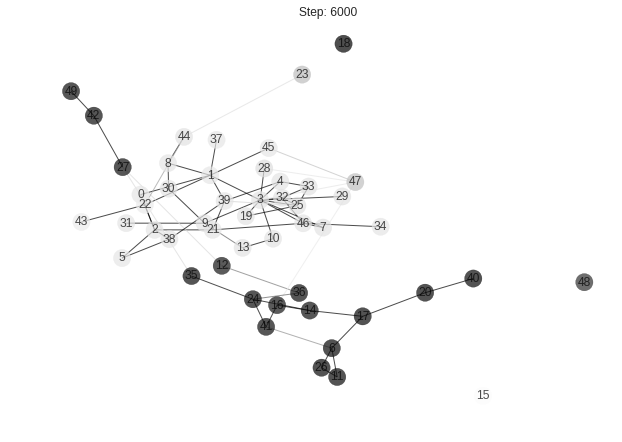

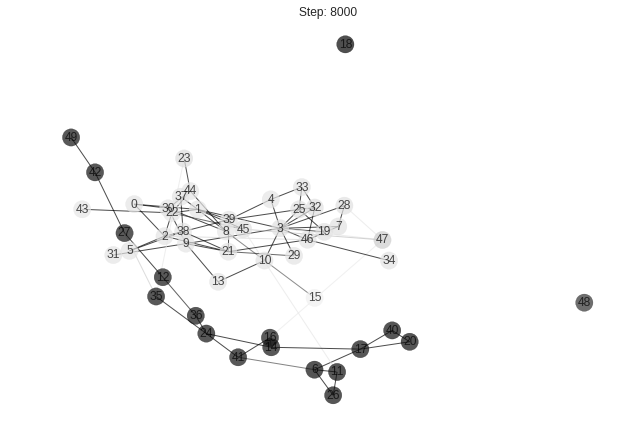

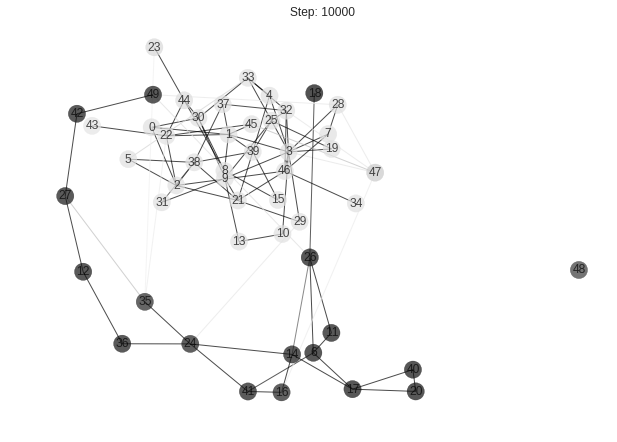

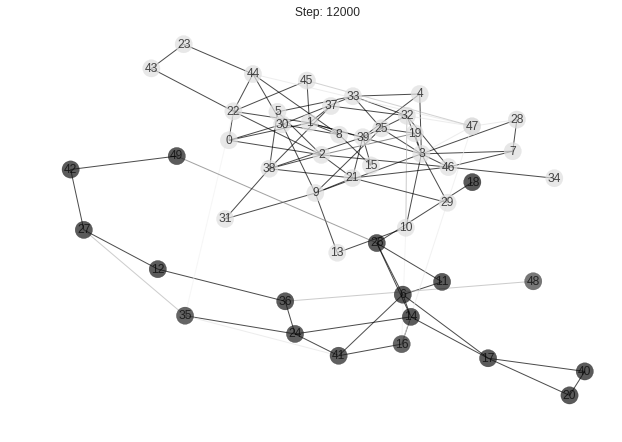

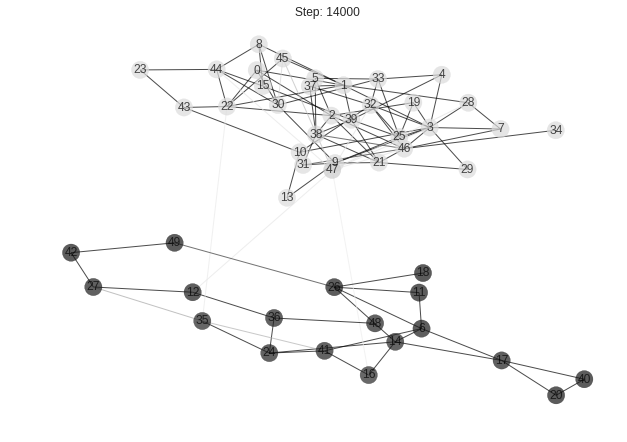

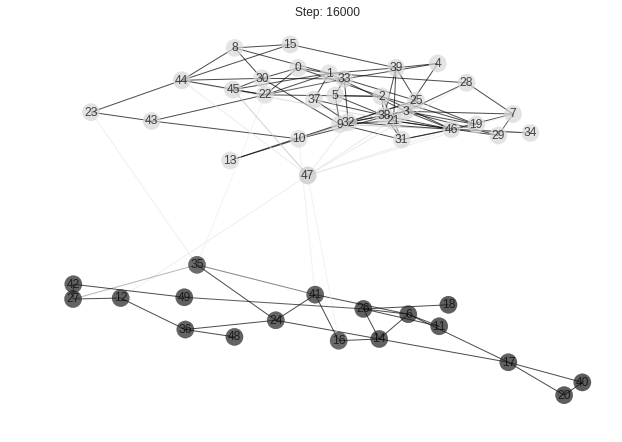

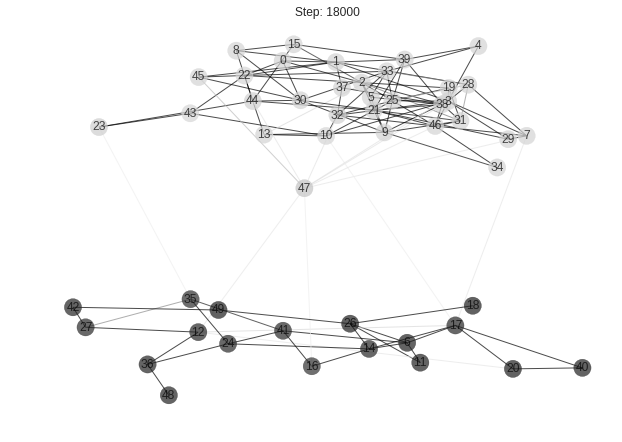

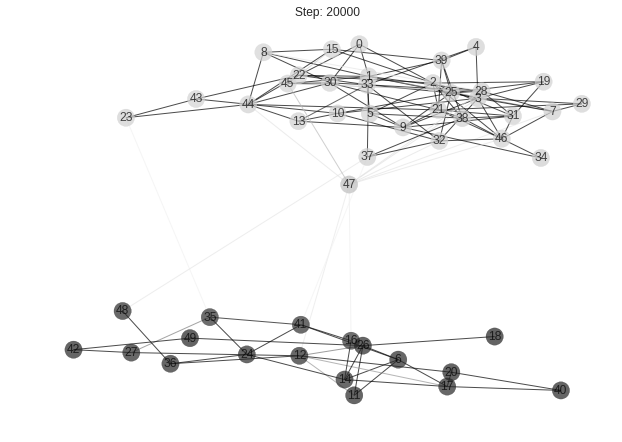

In [142]:
sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

#Part 4: Simulation Analysis

###Run experiments using your simulation to determine under what conditions social clusters form and under what conditions they split apart.

The simulation shows that it is very unlikely, even with values of gamma above 1, to have a separation into clusters. This is because the effects of connections are much stronger and there are very few individuals who hold extreme opinions that would cause a severance in relationships. Additionally, the strength of new relationships is determined by the number of common connections and therefore, it is hard to break newly formed connections that are formed in this type of graph (a barabasi alber graph) whereby a few inidivudals have strong network connections and therefore, it is highly likely that two connections share more than one common connection (two nodes share more than one neighbor). As implemented, this would mean that the strength of new connections is on average high. 

### Report on whether and how your simulations show patterns observed in real life.
This graph seems to model real life because in real life, we rarely have introductions to new connections unless we share a mutual friend and if the number of mutual friends shared increases, it is likely that this connection will continue to be stregnthed. Additionally, it is highly unlikely that we have people who hold very extreme opinions and even in such cases, we still have connections to them (they are not isolated) through relationship ties such as family ties. Therefore, even though these individuals have differing opinions, it is unlikely that they will break off from other social networks. This however, is possible in some cases such as what is modeled with a gamma of 3.3 and 4 where individuals are extremely picky with their connections and are only receptive to people of similar opinions (eg. terrorist groups). A majority of the population, even though they hold strong opinions, exhibit tolerance, which can be seen through the average weight between connections. 